<a href="https://colab.research.google.com/github/leonistor/ml-manning/blob/master/04-machine-learning/DecisionTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Trees

In [40]:
import numpy as np
import pandas as pd
from sklearn import tree

# buggy: content not "stable"
# input_file = "https://github.com/leonistor/ml-manning/raw/master/04-machine-learning/PastHires.csv"
# df = pd.read_csv(input_file, header=0)
# df

must_get_data = False

if must_get_data:
  import requests
  input_url = "https://github.com/leonistor/ml-manning/raw/master/04-machine-learning/PastHires.csv"
  data_file = "/tmp/PastHires.csv"
  response = requests.get(input_url, allow_redirects = True)
  if response.status_code != requests.codes.ok:
    with open("/tmp/PastHires.csv", mode='w') as f:
      f.write(response.text)
  else:
    print("Request error!")

df = pd.read_csv(data_file, header=0)
df

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N
5,0,N,0,PhD,Y,Y,Y
6,5,Y,2,MS,N,Y,Y
7,3,N,1,BS,N,Y,Y
8,15,Y,5,BS,N,N,Y
9,0,N,0,BS,N,N,N


In [41]:
# replace with numeric columns
d = {'Y': 1, 'N': 0}
df['Hired'] = df['Hired'].map(d)
df['Employed?'] = df['Employed?'].map(d)
df['Top-tier school'] = df['Top-tier school'].map(d)
df['Interned'] = df['Interned'].map(d)
de = {'BS': 0, 'MS': 1, 'PhD': 2}
df['Level of Education'] = df['Level of Education'].map(de)
df

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,1,4,0,0,0,1
1,0,0,0,0,1,1,1
2,7,0,6,0,0,0,0
3,2,1,1,1,1,0,1
4,20,0,2,2,1,0,0
5,0,0,0,2,1,1,1
6,5,1,2,1,0,1,1
7,3,0,1,0,0,1,1
8,15,1,5,0,0,0,1
9,0,0,0,0,0,0,0


In [42]:
# separate features from target
features = list(df.columns[:6])
features

['Years Experience',
 'Employed?',
 'Previous employers',
 'Level of Education',
 'Top-tier school',
 'Interned']

In [0]:
# decision tree
y = df['Hired']
X = df[features]

classifier = tree.DecisionTreeClassifier()
classifier = classifier.fit(X, y)

In [0]:
# install dependencies
# !apt-get -qq install -y graphviz && pip install -q pydot

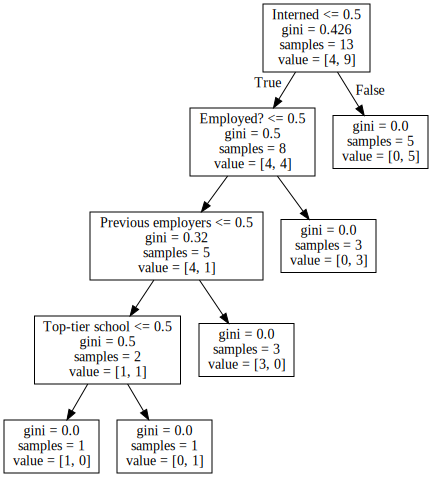

In [62]:
# display results
# from IPython.display import Image
# from sklearn.externals.six import StringIO
import pydot

from graphviz import Source
Source(tree.export_graphviz(classifier, out_file=None, feature_names=features))

# dot_data = StringIO()
# tree.export_graphviz(classifier, out_file=dot_data, feature_names=features)
# dot_data.readlines()
# graph = pydot.graph_from_dot_data(dot_data.getvalue())

# Image(graph.create_png())

## Ensemble learning: random forest

In [70]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X, y)

# predict employment of an employed 10-year veteran
print(clf.predict([[10, 1, 4, 0, 0, 0]]))
# predict employment of an unemployed 10-year veteran
print(clf.predict([[10, 0, 4, 0, 0, 0]]))
# random: not stable!

[1]
[0]
